In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spsp
import scipy.stats as spst
%matplotlib inline

# usual gangs

## Linear Regression - Maximum Likelihood - 

In [135]:
# this function outputs an covariance matrices avoiding generating too much squashed ellipses
def generate_nice_params():
    sg = 2 * np.random.rand() + 0.5
    phi1 = 3 * (np.random.rand() - .5)
    phi0 = 2 * (np.random.rand() - .5)
    phi = np.vstack((phi0, phi1))
    return sg, phi

def generate_samples(x_range, sg, phi, ns):
    x = np.random.rand(ns)
    x *= (x_range[1] - x_range[0])
    x += x_range[0]
    x = np.vstack((np.ones(ns), x))
    w  = np.dot(phi.T, x)
    w += np.random.randn(ns) * sg
    smp = np.vstack((x, w))
    return x, w, smp

def plot_samples(x, w, phi, clr=(0.8, 0.4, 0.0), lwd=2):
    '''plot the hypothetical data set'''
    line_x = np.array([[1., 1.], [-10, 10]])
    plt.plot(x[1], w.squeeze(), 'b.', markersize=5.)
    plt.plot(line_x[1], np.dot(phi.T, line_x).squeeze(), ls='-', lw = lwd, color=clr)
    
def plot_lg_pdf(phi, sg):
    n = 201
    nn = n**2
    res = np.linspace(-20, 20, n)
    x, y = np.meshgrid(res, res)
    x_flat = x.reshape(1, nn)
    y_flat = y.reshape(1, nn)
    x1_flat = np.vstack((np.ones(nn), x_flat.squeeze()))
    mu_flat = np.dot(phi.T, x1_flat)
    lg_pdf = spst.norm(mu_flat, sg).pdf(y_flat).reshape((n, n))
    lg_pdf = np.flipud(lg_pdf)
    plt.imshow(lg_pdf, extent=[-20, 20, -20, 20])

def maximum_likelihood_inference(x, w):
    phi = np.dot(np.linalg.inv(np.dot(x, x.T)), np.dot(x, w.T))
    delta = w - np.dot(phi.T, x)
    sg2 = (delta ** 2).mean()
    sg = np.sqrt(sg2)
    return phi, sg

def evaluate_average_log_likelihood(x, w, phi, sg):
    likelhd = spst.norm(np.dot(phi.T, x), sg).pdf(w)
    log_likelhd = np.log(likelhd)
    ave_log_likehd = log_likelhd.mean()
    return ave_log_likehd

true: sg = 1.3364, phi = [0.6270, -1.0712]
infr: sg = 1.4218, phi = [0.7526, -1.0352]


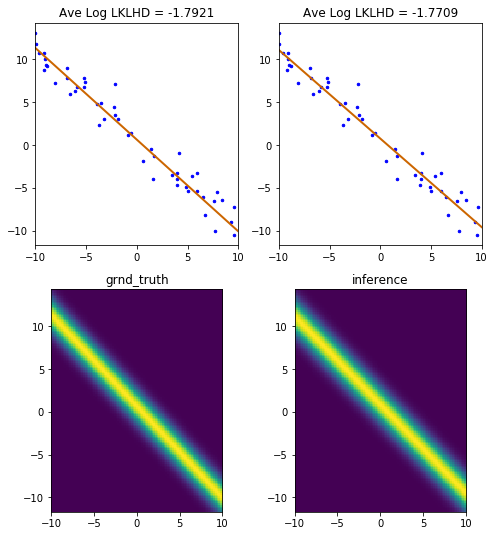

In [144]:
ns = 50
x_range = np.array([-10., 10.])
sg, phi = generate_nice_params()
plt.rcParams['figure.figsize'] = (8.0, 9.0)

x, w, smp = generate_samples(x_range, sg, phi, ns)
ax = plt.subplot(2,2,1)
plot_samples(x, w, phi)
ave_log_likehd_true = evaluate_average_log_likelihood(x, w, phi, sg)
plt.title("Ave Log LKLHD = {:1.4f}".format(ave_log_likehd_true))
plt.xlim(x_range)
ybound = ax.get_ybound()

phie, sge = maximum_likelihood_inference(x, w)
plt.subplot(2,2,2)
plot_samples(x, w, phie)
ave_log_likehd_infr = evaluate_average_log_likelihood(x, w, phie, sge)
plt.title("Ave Log LKLHD = {:1.4f}".format(ave_log_likehd_infr))
plt.xlim(x_range)
plt.ylim(*ybound)

plt.subplot(2,2,3)
plot_lg_pdf(phi, sg)
plt.xlim(x_range)
plt.ylim(*ybound)
plt.title("grnd_truth")

plt.subplot(2,2,4)
plot_lg_pdf(phie, sge)
plt.xlim(x_range)
plt.ylim(*ybound)
plt.title("inference")

print("true: sg = {0:1.4f}, phi = [{1:1.4f}, {2:1.4f}]".format(sg, phi[0][0], phi[1][0]))
print("infr: sg = {0:1.4f}, phi = [{1:1.4f}, {2:1.4f}]".format(sge, phie[0][0], phie[1][0]))

## Bayesian linear regression

## Non-linear regression

## Kernels and the kerneltrick

## Gaussian process regression

## Sparse linear regression

## Dual linear regression

## Relevance vector regression

## Regression to multivariate data